In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils import normalize_answer_vqa

## Evaluate Functions

In [6]:
def classify(df, yimg_col, ytxt_col, ymix_col):
    results = []

    for _, row in df.iterrows():
        yimg = normalize_answer_vqa(row[yimg_col])
        ytxt = normalize_answer_vqa(row[ytxt_col])
        ymix = normalize_answer_vqa(row[ymix_col])

        if yimg != ytxt: # apenas verificar os casos que a resposta com apenas a imagem é diferente da com o texto
            if ymix == ytxt:
                results.append("Text")
            elif ymix == yimg:
                results.append("Image")
            else:
                results.append("Other")

    return pd.Series(results)

In [7]:
def proportions(series):
    return series.value_counts(normalize=True) * 100

In [8]:
def tpr(series):
    text = (series == "Text").sum()
    img  = (series == "Image").sum()
    return text / (text + img) * 100

In [9]:
def plot_behavior(name, behavior_series, tpr_value):
    counts = behavior_series.value_counts(normalize=True) * 100
    
    img = counts.get("Image", 0)
    oth = counts.get("Other", 0)
    txt = counts.get("Text", 0)

    segments = [img, oth, txt]
    colors = ["#1f77b4", "#7f7f7f", "#ff7f0e"]

    plt.figure(figsize=(8, 1.4))

    left = 0
    for value, color in zip(segments, colors):
        plt.barh(" ", value, left=left, color=color)
        left += value

    plt.title(f"{name} (TPR={tpr_value:.1f}%)")
    plt.xlim(0, 100)
    plt.xlabel("Proportion (%)")
    plt.legend(["Image", "Other", "Text"], bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


## Evaluating Qwen2-VL-2B

In [10]:
df_qwen = pd.read_csv("data/qwen_2b_responses.csv")

In [11]:
df_qwen_match_behavior = classify(df_qwen, "base_responses", "Tm_responses", "mix_tm_responses")
df_qwen_conflict_behavior = classify(df_qwen, "base_responses", "Tc_responses", "mix_tc_responses")
df_qwen_irrelevant_behavior = classify(df_qwen, "base_responses", "Ti_responses", "mix_ti_responses")

In [12]:
match_prop = proportions(df_qwen_match_behavior)
conflict_prop = proportions(df_qwen_conflict_behavior)
irrelevant_prop = proportions(df_qwen_irrelevant_behavior)

tpr_match = tpr(df_qwen_match_behavior)
tpr_conflict = tpr(df_qwen_conflict_behavior)
tpr_irrelevant = tpr(df_qwen_irrelevant_behavior)

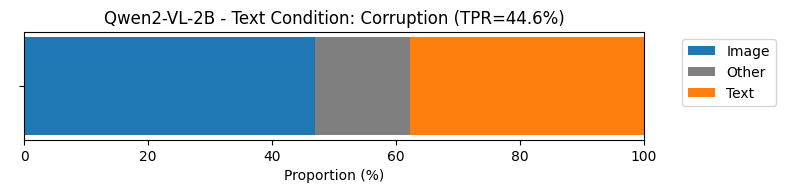

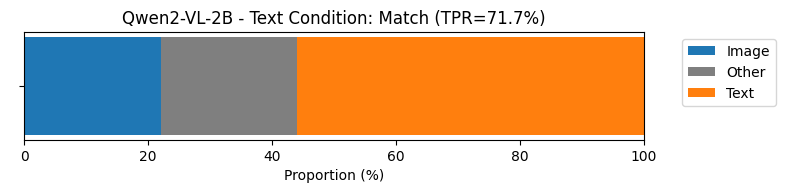

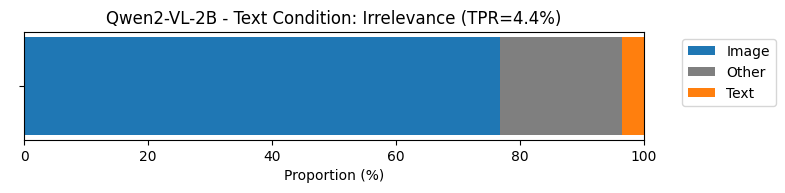

In [13]:
plot_behavior("Qwen2-VL-2B - Text Condition: Corruption", df_qwen_conflict_behavior, tpr_conflict)
plot_behavior("Qwen2-VL-2B - Text Condition: Match", df_qwen_match_behavior, tpr_match)
plot_behavior("Qwen2-VL-2B - Text Condition: Irrelevance", df_qwen_irrelevant_behavior, tpr_irrelevant)

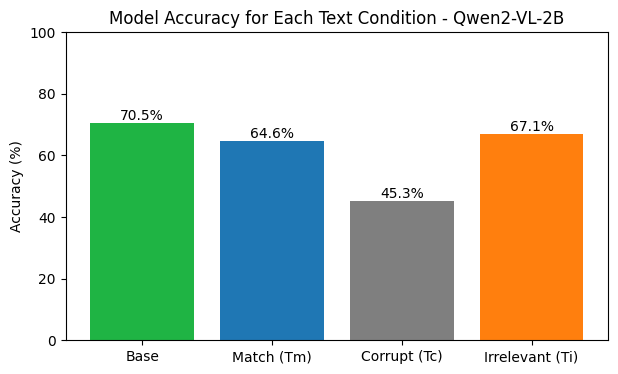

In [16]:
acc_base = (df_qwen["base_responses"].apply(normalize_answer_vqa) == df_qwen["answer"].apply(normalize_answer_vqa)).mean()*100
acc_match = (df_qwen["mix_tm_responses"].apply(normalize_answer_vqa) == df_qwen["answer"].apply(normalize_answer_vqa)).mean()*100
acc_corrupt = (df_qwen["mix_tc_responses"].apply(normalize_answer_vqa) == df_qwen["answer"].apply(normalize_answer_vqa)).mean()*100
acc_irrelevant = (df_qwen["mix_ti_responses"].apply(normalize_answer_vqa) == df_qwen["answer"].apply(normalize_answer_vqa)).mean()*100

accs = {
    "Base": acc_base,
    "Match (Tm)": acc_match,
    "Corrupt (Tc)": acc_corrupt,
    "Irrelevant (Ti)": acc_irrelevant
}

# Plot
plt.figure(figsize=(7,4))
plt.bar(accs.keys(), accs.values(), color = ["#1fb444", "#1f77b4", "#7f7f7f", "#ff7f0e"])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy for Each Text Condition - Qwen2-VL-2B")
plt.ylim(0,100)

for i, (k, v) in enumerate(accs.items()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

## Evaluating GPT-4o mini

In [17]:
df_mini = pd.read_csv("data/gpt_4o_mini_responses.csv")

In [18]:
df_mini_match_behavior = classify(df_mini, "Base_responses", "Tm_responses", "mix_tm_responses")
df_mini_conflict_behavior = classify(df_mini, "Base_responses", "Tc_responses", "mix_tc_responses")
df_mini_irrelevant_behavior = classify(df_mini, "Base_responses", "Ti_responses", "mix_ti_responses")

In [19]:
match_prop = proportions(df_mini_match_behavior)
conflict_prop = proportions(df_mini_conflict_behavior)
irrelevant_prop = proportions(df_mini_irrelevant_behavior)

tpr_match = tpr(df_mini_match_behavior)
tpr_conflict = tpr(df_mini_conflict_behavior)
tpr_irrelevant = tpr(df_mini_irrelevant_behavior)

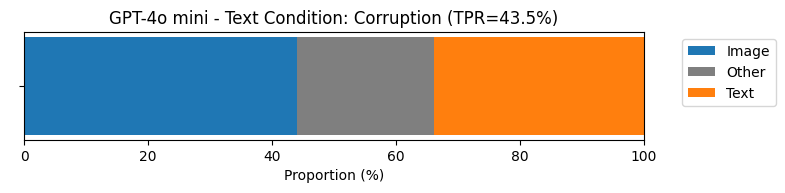

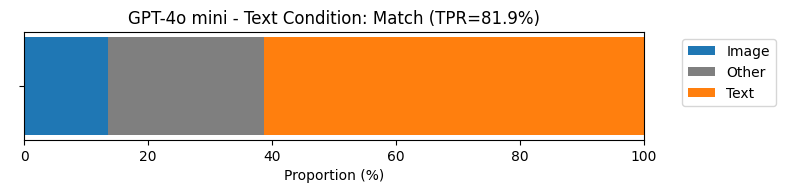

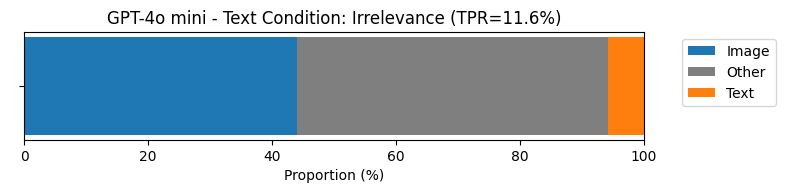

In [20]:
plot_behavior("GPT-4o mini - Text Condition: Corruption", df_mini_conflict_behavior, tpr_conflict)
plot_behavior("GPT-4o mini - Text Condition: Match", df_mini_match_behavior, tpr_match)
plot_behavior("GPT-4o mini - Text Condition: Irrelevance", df_mini_irrelevant_behavior, tpr_irrelevant)

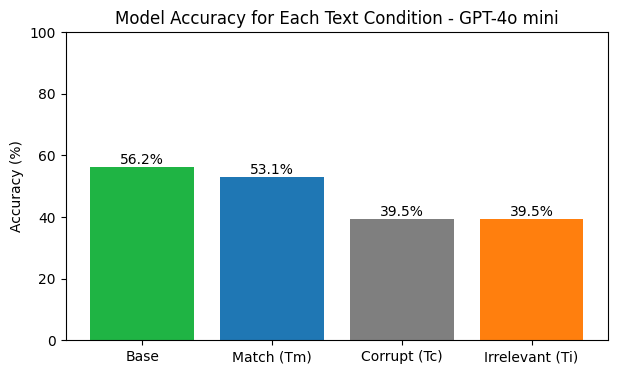

In [23]:
acc_base = (df_mini["Base_responses"].apply(normalize_answer_vqa) == df_mini["answer"].apply(normalize_answer_vqa)).mean()*100
acc_match = (df_mini["mix_tm_responses"].apply(normalize_answer_vqa) == df_mini["answer"].apply(normalize_answer_vqa)).mean()*100
acc_corrupt = (df_mini["mix_tc_responses"].apply(normalize_answer_vqa) == df_mini["answer"].apply(normalize_answer_vqa)).mean()*100
acc_irrelevant = (df_mini["mix_ti_responses"].apply(normalize_answer_vqa) == df_mini["answer"].apply(normalize_answer_vqa)).mean()*100

accs = {
    "Base": acc_base,
    "Match (Tm)": acc_match,
    "Corrupt (Tc)": acc_corrupt,
    "Irrelevant (Ti)": acc_irrelevant
}

# Plot
plt.figure(figsize=(7,4))
plt.bar(accs.keys(), accs.values(), color = ["#1fb444","#1f77b4", "#7f7f7f", "#ff7f0e"])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy for Each Text Condition - GPT-4o mini")
plt.ylim(0,100)

for i, (k, v) in enumerate(accs.items()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

## Evaluating Qwen2-VL-2B Tuned

In [26]:
df_qwen_ft = pd.read_csv("data/qwen_tuning_2b_responses.csv")

In [27]:
df_qwen_ft_match_behavior = classify(df_qwen_ft, "base_responses", "Tm_responses", "mix_tm_responses")
df_qwen_ft_conflict_behavior = classify(df_qwen_ft, "base_responses", "Tc_responses", "mix_tc_responses")
df_qwen_ft_irrelevant_behavior = classify(df_qwen_ft, "base_responses", "Ti_responses", "mix_ti_responses")

In [28]:
match_prop = proportions(df_qwen_ft_match_behavior)
conflict_prop = proportions(df_qwen_ft_conflict_behavior)
irrelevant_prop = proportions(df_qwen_ft_irrelevant_behavior)

tpr_match = tpr(df_qwen_ft_match_behavior)
tpr_conflict = tpr(df_qwen_ft_conflict_behavior)
tpr_irrelevant = tpr(df_qwen_ft_irrelevant_behavior)

In [29]:
df_qwen_ft_conflict_behavior.value_counts()

Text     450
Image    283
Other     99
Name: count, dtype: int64

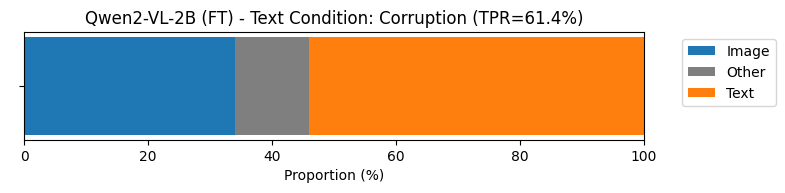

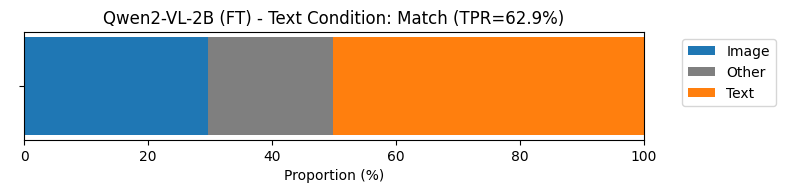

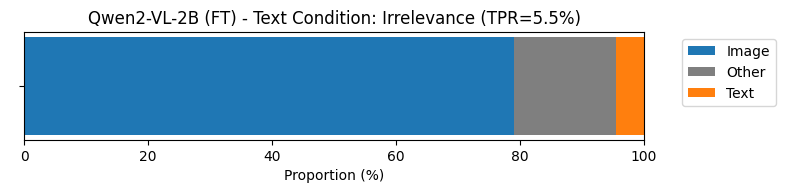

In [30]:
plot_behavior("Qwen2-VL-2B (FT) - Text Condition: Corruption", df_qwen_ft_conflict_behavior, tpr_conflict)
plot_behavior("Qwen2-VL-2B (FT) - Text Condition: Match", df_qwen_ft_match_behavior, tpr_match)
plot_behavior("Qwen2-VL-2B (FT) - Text Condition: Irrelevance", df_qwen_ft_irrelevant_behavior, tpr_irrelevant)

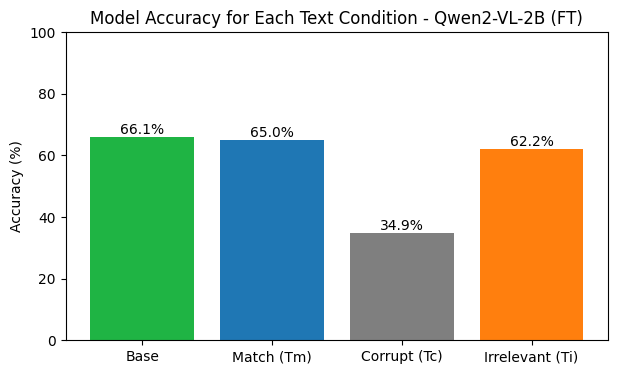

In [31]:
acc_base = (df_qwen_ft["base_responses"].apply(normalize_answer_vqa) == df_qwen_ft["answer"].apply(normalize_answer_vqa)).mean()*100
acc_match = (df_qwen_ft["mix_tm_responses"].apply(normalize_answer_vqa) == df_qwen_ft["answer"].apply(normalize_answer_vqa)).mean()*100
acc_corrupt = (df_qwen_ft["mix_tc_responses"].apply(normalize_answer_vqa) == df_qwen_ft["answer"].apply(normalize_answer_vqa)).mean()*100
acc_irrelevant = (df_qwen_ft["mix_ti_responses"].apply(normalize_answer_vqa) == df_qwen_ft["answer"].apply(normalize_answer_vqa)).mean()*100

accs = {
    "Base": acc_base,
    "Match (Tm)": acc_match,
    "Corrupt (Tc)": acc_corrupt,
    "Irrelevant (Ti)": acc_irrelevant
}

# Plot
plt.figure(figsize=(7,4))
plt.bar(accs.keys(), accs.values(), color = ["#1fb444","#1f77b4", "#7f7f7f", "#ff7f0e"])
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy for Each Text Condition - Qwen2-VL-2B (FT)")
plt.ylim(0,100)

for i, (k, v) in enumerate(accs.items()):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()